In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 14,
          'figure.figsize': (10, 10),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
plt.rcParams.update(params) 

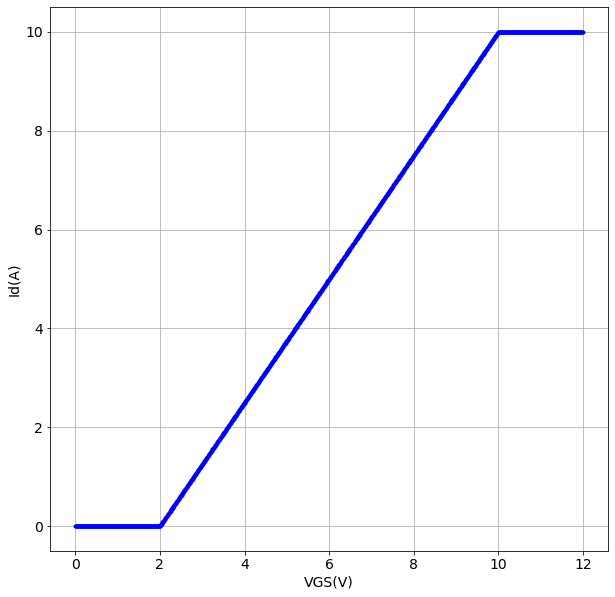

In [3]:
# Defino la transferencia del dispositivo
def idi(v):
    i =  0.             if (v < 2) else 0
    i = (10/8)*(v-2) if (v >= 2  and v < 10) else i
    i = (10) if (v >= 10  ) else i
    return i


# Grafico para verificar!
vgsa = np.arange(0,12,0.01)
idsa = np.array([idi(v) for v in vgsa])

plt.plot(vgsa,idsa,'b.')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Id(A)')
plt.xlabel('VGS(V)')
plt.show()

In [59]:
# Tensión Fuente
VDD  = 100
# Tension minima 
Vmin = 10
# Tension entrada 
VGG = -10
vg  = 20

# Filtro salida
Qo  = np.inf
Qc  = 10

# Frecuencia de trabajo
fc = 100e6



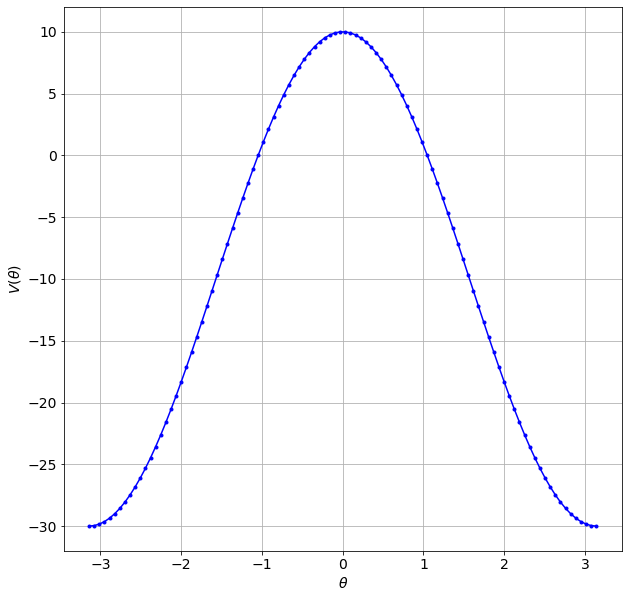

In [60]:
# Tensión entrada
# defino el sampleo
n  = 100
# vector de tiempo 
th  = np.pi*np.linspace(-1, 1, num=n)

vgs = VGG + vg * np.cos(th)



plt.plot(th, vgs,'b.-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('$V(\\theta)$')
plt.xlabel('$\\theta$')
plt.show()



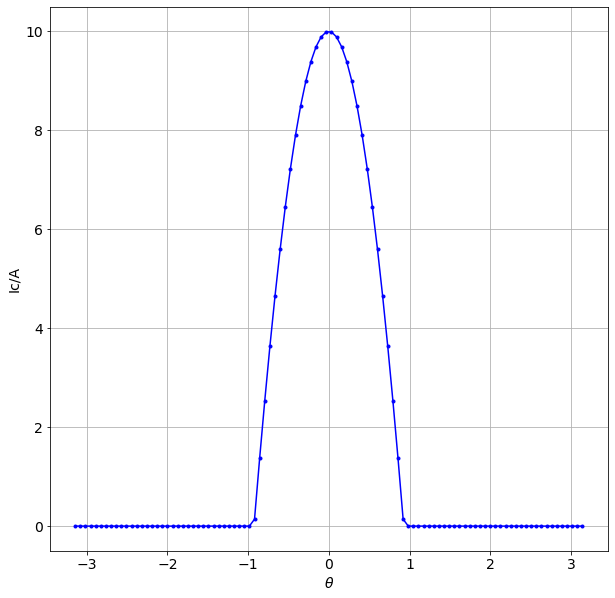

In [62]:
# Corriente de salida
ids = np.array([idi(v) for v in vgs])

plt.plot(th, ids,'b.-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic/A')
plt.xlabel('$\\theta$')
plt.show()



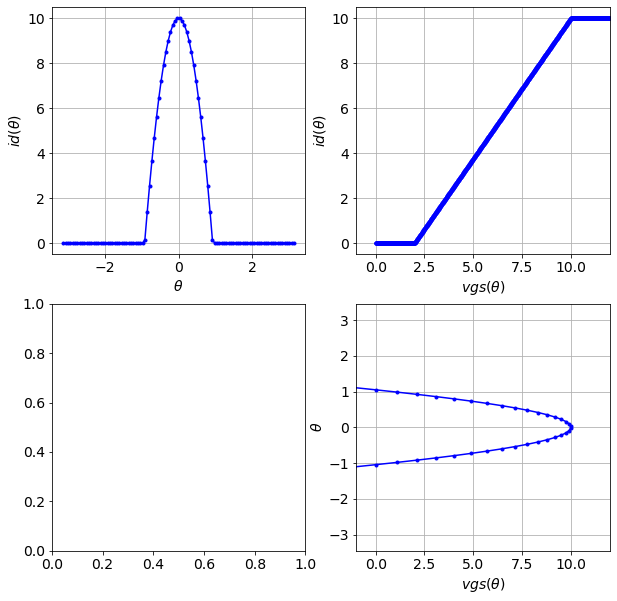

In [63]:
#Oscilogramas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


# Plot various projections of the samples.
ax1.plot(th, ids, 'b.-')
ax1.grid(True)
ax1.set(xlabel='$\\theta$', ylabel='$id(\\theta)$')


ax2.plot(vgsa, idsa, 'b.-')
ax2.grid(True)
ax2.set(xlabel='$vgs(\\theta)$', ylabel='$id(\\theta)$')
ax2.set(xlim=(-1, 12))

ax4.plot(vgs,th, 'b.-')
ax4.set(xlabel='$vgs(\\theta)$', ylabel='$\\theta$')
ax4.set
ax4.grid(True)
ax4.set(xlim=(-1, 12))

plt.show()


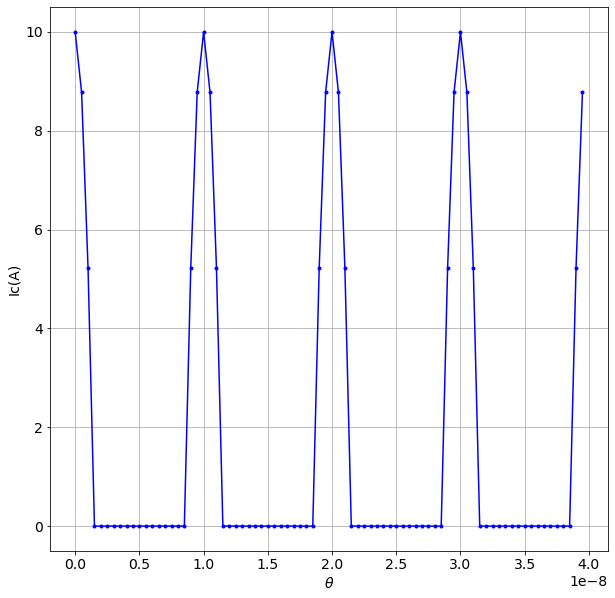

In [68]:
# Defino muestreo para graficar 
# La frecuencia maxima que muestra Fourier es fs/2
# Se busca que fuera de la zona de Nysquit las componentes armonicas sean despresiables
fs = 20*fc
ds = 1/fs

# vector de tiempo 
# Defino resolución espectral en frecuencia !
numT  = 4
T     = numT/fc
time  = np.arange(0,T,ds)


vgs = VGG + vg * np.cos(2*np.pi*fc*time)

idst = np.array([idi(v) for v in vgs])

plt.plot(time, idst,'b.-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()


Id0 = 1.900 A
Id1 = 3.515 A


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


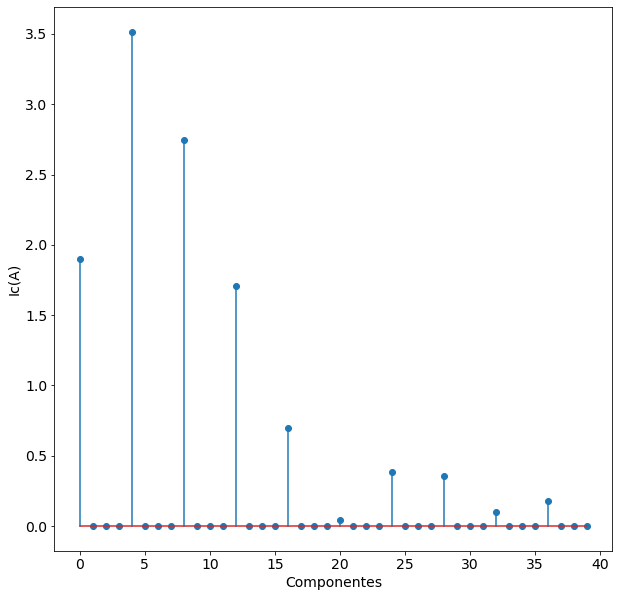

In [69]:
# Transformada Discreta de Fourier    
# Se calcula a modo ejemplo con objetivos didacticos (no es la forma optima!)
def DFT(x):
    N = len(x)
    X = list()
    for k in range(int(N/2)):
        a = 2*sum([s*np.cos(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        b = 2*sum([s*np.sin(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        if k == 0: X.append(a/2)
        else     : X.append(a+1j*b)
    return np.array(X) 

# Calculo las componentes de la serie de Fourier

Idsf = DFT(idst)

print('Id0 = {:1.3f} A'.format(abs(Idsf[0]   ) ) )
print('Id1 = {:1.3f} A'.format(abs(Idsf[numT]) ) )

# Grafico
plt.stem(abs(Idsf) )
plt.ylabel('Ic(A)')
plt.xlabel('Componentes')
plt.show()



In [75]:
# Calculo resistencia de carga para max excursion de salida

Rd  = (VDD -  Vmin)/abs(Idsf[numT]) 

L   = (1/Qc-1/Qo)*Rd/(2*np.pi*fc)

C   = 1/(L*(2*np.pi*fc)**2)

print('.param Rd = {:1.2f}'.format(abs(Rd)))

print('.param L = {:1.4e}'.format(abs(L)))
print('.param C = {:1.4e}'.format(abs(C)))





.param Rd = 25.61
.param L = 4.0752e-09
.param C = 6.2156e-10


In [76]:
Id0 = Idsf[0]

Id1 = Idsf[numT  ].real * np.cos(2*np.pi*fc*time) + 1j * Idsf[numT  ].imag * np.sin(2*np.pi*fc*time)
Vd1 = Id1 * Rd

Id2 = Idsf[2*numT].real * np.cos(2*np.pi*fc*2*time) + 1j * Idsf[numT*2].imag * np.sin(2*np.pi*fc*2*time)
Vd2 = Id2 * Rd / (1+Qc**2*(2/1-1/2)**2)**0.5

Id3 = Idsf[3*numT].real * np.cos(2*np.pi*fc*3*time) + 1j * Idsf[numT*3].imag * np.sin(2*np.pi*fc*3*time)
Vd3 = Id3 * Rd / (1+Qc**2*(3/1-1/3)**2)**0.5


/home/aalmela/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


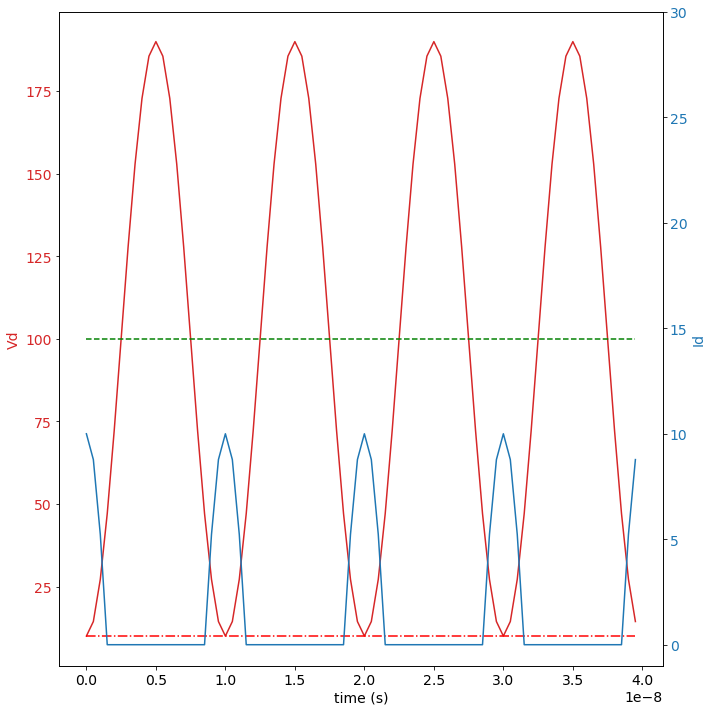

In [77]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Vd', color=color)
ax1.plot(time, VDD - Rd*Id1, color=color)
ax1.plot(time, [VDD for t in time] , 'g--')
ax1.plot(time, [Vmin for t in time] , 'r-.')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Id', color=color)  # we already handled the x-label with ax1
ax2.plot(time, ids, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set(ylim=(-1, 30))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Metodo de los trapecios 

El metodo de los trapecios permite calcular las componentes de Fourier de forma aproximada empleando un muestreo discreto.

Este metodo emplea trapecios para estimar el area de calculada por la integral en las componentes de Fourier. 


$f(t) = {a_0} + \sum_{n=1}^\infty\left(a_n\cos\left( \frac{2\pi}{T}\cdot  n \cdot t \right) + b_n\sin \left( \frac{2\pi}{T} \cdot  n \cdot t \right) \right)$


siendo:

$ a_0 = \frac{1}{T} \sum_{i=\frac{-N}{2}}^{\frac{N}{2}-1} f(T_s \cdot i) \cdot T_s $

$ a_n = \frac{2}{T} \sum_{i=\frac{-N}{2}}^{\frac{N}{2}-1}  f(T_s \cdot i) \cdot \cos{(\frac{2\cdot \pi }{T} \cdot n \cdot T_s \cdot i )} \cdot T_s $ 

$ b_n = \frac{2}{T} \sum_{i=\frac{-N}{2}}^{\frac{N}{2}-1}  f(T_s \cdot i) \cdot \sin{(\frac{2\cdot \pi }{T} \cdot n \cdot T_s \cdot i )} \cdot T_s $ 

donde:
$ T   $ es el periodo de la señal, $ T_s $ es el periodo del muestreo y $ N = \frac{T}{T_s} $

Si $N = 24$  resulta entonces (valido para una función par):

$ a_0 = \frac{1}{12} \sum_{i=0}^{\frac{N}{2}-1} f(T_s \cdot i) =  \frac{1}{12} ( \frac{A+B}{2} + \frac{B+C}{2} + \frac{C+D}{2}+ \frac{D+E}{2}+ \frac{E+F}{2}+ \frac{F+G}{2}+ \frac{G+H}{2} + \frac{H+I}{2}+ \frac{I+J}{2}+ \frac{J+K}{2} )   $

$ a_0 = \frac{1}{12} ( \frac{A}{2} + B + C + D +E+ F  + G + H + I + J + \frac{K}{2})   $


$ a_n = \frac{1}{6} \sum_{i=0}^{\frac{N}{2}-1}  f(T_s \cdot i) \cdot \cos{(\frac{2\cdot \pi }{24} \cdot i \cdot n )} $ 

$ a_n =  \frac{1}{6} ( \frac{A}{2}  + B \cos{\frac{\pi }{12}}+ C \cos{\frac{2\cdot \pi }{12}}+ D\cos{\frac{3\cdot \pi }{12}}+ E\cos{\frac{4\cdot \pi }{12}} + F \cos{\frac{ \cdot \pi  }{12}}+ G \cos{ \frac{ \cdot \pi }{12}}+ H \cos{\frac{7 \cdot \pi }{12}}+ I \cos{\frac{8\cdot \pi }{12}}+ J \cos{\frac{9\cdot \pi }{12}}+ \frac{K}{2}\cos{\frac{10\cdot \pi }{12}} )  $


$ b_n = 0 $ 



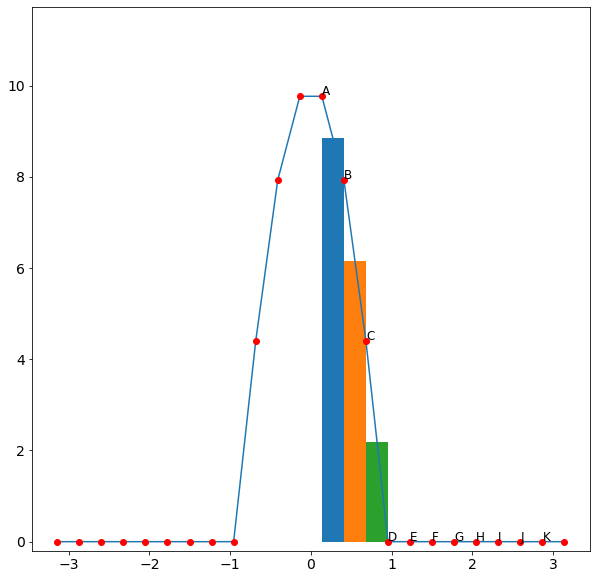

In [80]:
# Defino el vector de tiempo del muestreo
th  = np.pi*np.linspace(-1, 1, num=24)

vgs = VGG + vg * np.cos(th)


# Corriente de salida
ids = np.array([idi(v) for v in vgs])

Sm = ids
# Defino el vector 
myPoint  = [ 'A','B','C','D','E','F','G','H','I','J','K']

plt.plot(th, ids)
plt.plot(th, Sm, 'ro')
for i, mp in enumerate(myPoint):
    plt.text(th[i+12], Sm[i+12] +0.02, mp, fontsize=12)
    plt.fill_between(th[i+12:i+14], 0, (Sm[i+12] + Sm[i+13] )/2 )
plt.ylim([-0.2,max(Sm)*1.2])
plt.show()

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


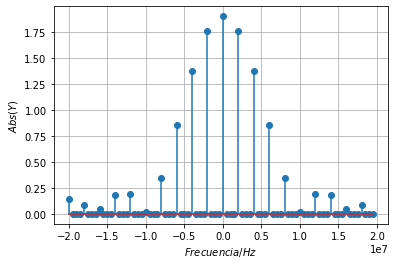

In [14]:
## Calculo del espectro empleando la funciones de scipy.fftpack  (fft, fftfreq)
#Se emplea mide el tiempo de computo de la función con fines de comparación. 

Y = fft(ids)/len(ids)  # Normalizada
#S = np.fft.fftshift(np.fft.fft(s))
#S_mag = np.abs(S)
#S_phase = np.angle(S)


frq = fftfreq(len(ids), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, 0.8)
plt.xlabel('$Frecuencia/Hz$'); plt.ylabel('$Abs(Y)$')
plt.grid(); plt.show()